In [1]:
import time, os, math, numpy as np, pandas as pd, sklearn as sk, matplotlib as plt

In [31]:
# Load dataset for all Primary Care HPSA destinations with one record per facility
df_hpsa_pc = pd.read_csv("data/BCD_HPSA_FCT_DET_PC.csv")

# Load dataset for all Mental Health HPSA destinations with one record per facility
df_hpsa_mh = pd.read_csv('data/BCD_HPSA_FCT_DET_MH.csv')

# load dataset necessary for joining city data
df_cities = pd.read_csv('data/us_cities.csv')

In [32]:
duplicates = df_hpsa_pc[df_hpsa_pc.duplicated()]
duplicates

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,PC MCTA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,...,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 65
6349,Palo Verde/Blythe,1069990657,Geographic HPSA,Primary Care,0,NaN,CA,Withdrawn,06/12/1978,09/20/1999,...,R,CA,06065,6,California,Y,N,04/09/2024,2024/04/09,NaN
9381,West Point,1519995132,Geographic HPSA,Primary Care,0,NaN,VA,Withdrawn,06/15/1983,09/22/1988,...,N,VA,51053,51,Virginia,N,N,04/09/2024,2024/04/09,NaN
33044,Medical Ind. - Racine,1559995533,HPSA Population,Primary Care,0,NaN,WI,Withdrawn,05/20/1978,03/26/1984,...,N,WI,55101,55,Wisconsin,N,N,04/09/2024,2024/04/09,NaN
45465,Southern Guam,1669996601,Geographic HPSA,Primary Care,0,NaN,GU,Withdrawn,09/12/1980,06/13/1988,...,R,GU,66010,66,Guam,N,N,04/09/2024,2024/04/09,NaN


In [33]:
df_hpsa_pc.head()

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,PC MCTA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,...,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 65
0,East Toledo,1396315268,High Needs Geographic HPSA,Primary Care,15,18.0,OH,Designated,01/31/1992,09/09/2021,...,N,OH,39095,39,Ohio,N,N,04/09/2024,2024/04/09,NaN
1,East Toledo,1396315268,High Needs Geographic HPSA,Primary Care,15,18.0,OH,Designated,01/31/1992,09/09/2021,...,N,OH,39095,39,Ohio,N,N,04/09/2024,2024/04/09,NaN
2,East Toledo,1396315268,High Needs Geographic HPSA,Primary Care,15,18.0,OH,Designated,01/31/1992,09/09/2021,...,N,OH,39095,39,Ohio,N,N,04/09/2024,2024/04/09,NaN
3,Noble Correctional Institution,1396293612,Correctional Facility,Primary Care,6,0.0,OH,Designated,08/25/1999,03/15/2022,...,R,OH,39121,39,Ohio,N,N,04/09/2024,2024/04/09,NaN
4,EDGERTON FAMILY HEALTH CENTER,1396199989,Rural Health Clinic,Primary Care,14,15.0,OH,Designated,12/16/2022,12/16/2022,...,R,OH,39171,39,Ohio,N,N,04/09/2024,2024/04/09,NaN


In [34]:
df_hpsa_pc = df_hpsa_pc.rename(columns={'HPSA Score': 'PC_HPSA_Score'})
df_hpsa_pc.drop(["HPSA Discipline Class", "Primary State Abbreviation", 
                 "HPSA Geography Identification Number","State Abbreviation",
                 "State and County Federal Information Processing Standard Code","State FIPS Code",
                 "Unnamed: 65", "Primary State FIPS Code", "Primary State Name", "Data Warehouse Record Create Date",
                 "Data Warehouse Record Create Date Text", "HPSA Withdrawn Date String", 'Common Postal Code',
                 'Common Region Name', 'Common State Abbreviation','Common State County FIPS Code', 
                 'Common State FIPS Code','Common State Name','HPSA Postal Code'
                ], axis=1, inplace=True)
df_hpsa_pc

,HPSA Name,HPSA ID,Designation Type,PC_HPSA_Score,PC MCTA Score,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Degree of Shortage,...,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,Provider Type,Rural Status Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator
0,East Toledo,1396315268,High Needs Geographic HPSA,15,18.0,Designated,01/31/1992,09/09/2021,Unknown,Not applicable,...,3000:1,NaN,7.8600,D,Hpsa Geo HN,Not Applicable,N,Ohio,N,N
1,East Toledo,1396315268,High Needs Geographic HPSA,15,18.0,Designated,01/31/1992,09/09/2021,Unknown,Not applicable,...,3000:1,NaN,7.8600,D,Hpsa Geo HN,Not Applicable,N,Ohio,N,N
2,East Toledo,1396315268,High Needs Geographic HPSA,15,18.0,Designated,01/31/1992,09/09/2021,Unknown,Not applicable,...,3000:1,NaN,7.8600,D,Hpsa Geo HN,Not Applicable,N,Ohio,N,N
3,Noble Correctional Institution,1396293612,Correctional Facility,6,0.0,Designated,08/25/1999,03/15/2022,Unknown,6,...,1000:1,NaN,2.2100,D,PRSN,NaN,R,Ohio,N,N
4,EDGERTON FAMILY HEALTH CENTER,1396199989,Rural Health Clinic,14,15.0,Designated,12/16/2022,12/16/2022,Unknown,NaN,...,NaN,NaN,NaN,D,RHC,NaN,R,Ohio,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66853,Lipscomb County,1489614717,Geographic HPSA,14,14.0,Designated,08/31/1988,09/10/2021,Unknown,Not applicable,...,3500:1,NaN,0.9500,D,Hpsa Geo,Not Applicable,R,Texas,N,N
66854,SEMINOLE FAMILY MEDICAL CLINIC,1489613453,Rural Health Clinic,16,16.0,Withdrawn,09/18/2020,02/05/2024,Unknown,NaN,...,NaN,NaN,NaN,W,RHC,NaN,R,Texas,N,N
66855,Schleicher County,1489579497,Geographic HPSA,15,13.0,Designated,02/27/2009,07/28/2021,Unknown,Not applicable,...,3500:1,NaN,0.8500,D,Hpsa Geo,Not Applicable,R,Texas,N,N
66856,LI - Baylor County,1489572655,HPSA Population,10,12.0,Designated,09/20/2017,09/08/2021,Unknown,Not applicable,...,3000:1,NaN,0.1040,D,Hpsa Pop,Not Applicable,R,Texas,N,N


In [35]:
df_hpsa_pc.columns

Index(['HPSA Name', 'HPSA ID', 'Designation Type', 'PC_HPSA_Score',
       'PC MCTA Score', 'HPSA Status', 'HPSA Designation Date',
       'HPSA Designation Last Update Date', 'Metropolitan Indicator',
       'HPSA Degree of Shortage', 'Withdrawn Date', 'HPSA FTE',
       'HPSA Designation Population', '% of Population Below 100% Poverty',
       'HPSA Formal Ratio', 'HPSA Population Type', 'Rural Status',
       'Longitude', 'Latitude', 'BHCMIS Organization Identification Number',
       'Break in Designation', 'Common County Name', 'County Equivalent Name',
       'County or County Equivalent Federal Information Processing Standard Code',
       'Discipline Class Number', 'HPSA Address', 'HPSA City',
       'HPSA Component Name', 'HPSA Component Source Identification Number',
       'HPSA Component State Abbreviation', 'HPSA Component Type Code',
       'HPSA Component Type Description',
       'HPSA Designation Population Type Description',
       'HPSA Estimated Served Population',

<AxesSubplot:>

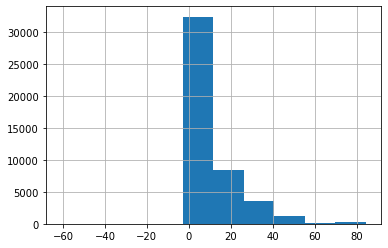

In [46]:
df_hpsa_pc["HPSA Shortage"].hist()

In [36]:
df_select_pc = df_hpsa_pc[["State Name",'HPSA City','Common County Name', 'County Equivalent Name',
                           'Designation Type', 'PC_HPSA_Score', 'PC MCTA Score', 'HPSA Status', 'HPSA Designation Date',
                          'HPSA Designation Last Update Date']]
df_select_pc

,State Name,HPSA City,Common County Name,County Equivalent Name,Designation Type,PC_HPSA_Score,PC MCTA Score,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date
0,Ohio,NaN,"Lucas County, OH",Lucas,High Needs Geographic HPSA,15,18.0,Designated,01/31/1992,09/09/2021
1,Ohio,NaN,"Lucas County, OH",Lucas,High Needs Geographic HPSA,15,18.0,Designated,01/31/1992,09/09/2021
2,Ohio,NaN,"Lucas County, OH",Lucas,High Needs Geographic HPSA,15,18.0,Designated,01/31/1992,09/09/2021
3,Ohio,Caldwell,"Noble County, OH",Noble,Correctional Facility,6,0.0,Designated,08/25/1999,03/15/2022
4,Ohio,Edgerton,"Williams County, OH",Williams,Rural Health Clinic,14,15.0,Designated,12/16/2022,12/16/2022
...,...,...,...,...,...,...,...,...,...,...
66853,Texas,NaN,"Lipscomb County, TX",Lipscomb,Geographic HPSA,14,14.0,Designated,08/31/1988,09/10/2021
66854,Texas,Seminole,"Gaines County, TX",Gaines,Rural Health Clinic,16,16.0,Withdrawn,09/18/2020,02/05/2024
66855,Texas,NaN,"Schleicher County, TX",Schleicher,Geographic HPSA,15,13.0,Designated,02/27/2009,07/28/2021
66856,Texas,NaN,"Baylor County, TX",Baylor,HPSA Population,10,12.0,Designated,09/20/2017,09/08/2021


In [37]:
df_select_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66858 entries, 0 to 66857
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   State Name                         66858 non-null  object 
 1   HPSA City                          6924 non-null   object 
 2   Common County Name                 66858 non-null  object 
 3   County Equivalent Name             66858 non-null  object 
 4   Designation Type                   66858 non-null  object 
 5   PC_HPSA_Score                      66858 non-null  int64  
 6   PC MCTA Score                      21358 non-null  float64
 7   HPSA Status                        66858 non-null  object 
 8   HPSA Designation Date              66858 non-null  object 
 9   HPSA Designation Last Update Date  66858 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 5.1+ MB


In [38]:
df_cities.rename(columns={"STATE_NAME": "State Name", "COUNTY": 'County Equivalent Name'}, inplace=True)
df_cities.head()

,ID,STATE_CODE,State Name,CITY,County Equivalent Name,LATITUDE,LONGITUDE
0,1,AK,Alaska,Adak,Aleutians West,55.999722,-161.207778
1,2,AK,Alaska,Akiachak,Bethel,60.891854,-161.392330
2,3,AK,Alaska,Akiak,Bethel,60.890632,-161.199325
3,4,AK,Alaska,Akutan,Aleutians East,54.143012,-165.785368
4,5,AK,Alaska,Alakanuk,Kusilvak,62.746967,-164.602280


In [41]:
df_cities.shape

(29880, 7)

In [39]:
df_select_pc.columns

Index(['State Name', 'HPSA City', 'Common County Name',
       'County Equivalent Name', 'Designation Type', 'PC_HPSA_Score',
       'PC MCTA Score', 'HPSA Status', 'HPSA Designation Date',
       'HPSA Designation Last Update Date'],
      dtype='object')

In [43]:
# Merge df1 (with missing cities) and df2 (potentially with complete cities) on State and County
merged_df = df_cities.merge(df_select_pc, how="outer", on=["County Equivalent Name", "State Name"])
merged_df

,ID,STATE_CODE,State Name,CITY,County Equivalent Name,LATITUDE,LONGITUDE,HPSA City,Common County Name,Designation Type,PC_HPSA_Score,PC MCTA Score,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date
0,1,AK,Alaska,Adak,Aleutians West,55.999722,-161.207778,Nikolski,"Aleutians West Census Area, AK","Indian Health Service, Tribal Health, and Urba...",8.0,10.0,Designated,08/18/2019,09/12/2021
1,1,AK,Alaska,Adak,Aleutians West,55.999722,-161.207778,NaN,"Aleutians West Census Area, AK",Geographic HPSA,10.0,8.0,Designated,06/17/1992,03/14/2022
2,1,AK,Alaska,Adak,Aleutians West,55.999722,-161.207778,Adak,"Aleutians West Census Area, AK","Indian Health Service, Tribal Health, and Urba...",8.0,10.0,Designated,08/18/2019,09/12/2021
3,1,AK,Alaska,Adak,Aleutians West,55.999722,-161.207778,Atka,"Aleutians West Census Area, AK","Indian Health Service, Tribal Health, and Urba...",8.0,10.0,Designated,08/18/2019,09/11/2021
4,1,AK,Alaska,Adak,Aleutians West,55.999722,-161.207778,Unalaska,"Aleutians West Census Area, AK","Indian Health Service, Tribal Health, and Urba...",6.0,9.0,Designated,08/18/2019,09/11/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426462,29880,WY,Wyoming,Yoder,Goshen,41.912018,-104.353507,NaN,"Goshen County, WY",Geographic HPSA,0.0,NaN,Withdrawn,12/19/2007,03/30/2012
1426463,29880,WY,Wyoming,Yoder,Goshen,41.912018,-104.353507,NaN,"Goshen County, WY",HPSA Population,14.0,14.0,Designated,03/30/2012,09/02/2021
1426464,29880,WY,Wyoming,Yoder,Goshen,41.912018,-104.353507,NaN,"Goshen County, WY",HPSA Population,14.0,14.0,Designated,03/30/2012,09/02/2021
1426465,29880,WY,Wyoming,Yoder,Goshen,41.912018,-104.353507,NaN,"Goshen County, WY",HPSA Population,14.0,14.0,Designated,03/30/2012,09/02/2021


In [48]:
df_hpsa_pc["HPSA City"].value_counts().reset_index()

,HPSA City,count
0,Los Angeles,44
1,Chicago,37
2,Anchorage,32
3,New York,29
4,Houston,25
...,...,...
3314,House Springs,1
3315,Berne,1
3316,North Vernon,1
3317,Flora,1


In [39]:
duplicates = df_hpsa_pc[df_hpsa_pc.duplicated()]

In [40]:
duplicates

,HPSA Name,HPSA ID,Designation Type,PC_HPSA_Score,PC MCTA Score,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Degree of Shortage,...,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,Provider Type,Rural Status Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator
256,St. James/Butterfield,1279992743,Geographic HPSA,0,NaN,Withdrawn,11/27/1991,12/31/1996,Non-Metropolitan,Not applicable,...,3500:1,10492.0,0.8,W,Hpsa Geo,Not Applicable,R,Minnesota,N,N
261,St. James/Butterfield,1279992743,Geographic HPSA,0,NaN,Withdrawn,11/27/1991,12/31/1996,Non-Metropolitan,Not applicable,...,3500:1,10492.0,0.8,W,Hpsa Geo,Not Applicable,R,Minnesota,N,N
267,St. James/Butterfield,1279992743,Geographic HPSA,0,NaN,Withdrawn,11/27/1991,12/31/1996,Non-Metropolitan,Not applicable,...,3500:1,10492.0,0.8,W,Hpsa Geo,Not Applicable,R,Minnesota,N,N
273,Graceville,1279992742,Geographic HPSA,0,NaN,Withdrawn,09/13/1991,12/31/1996,Non-Metropolitan,Not applicable,...,3500:1,4253.0,1.2,W,Hpsa Geo,Not Applicable,R,Minnesota,N,N
295,Graceville,1279992742,Geographic HPSA,0,NaN,Withdrawn,09/13/1991,12/31/1996,Non-Metropolitan,Not applicable,...,3500:1,4253.0,1.2,W,Hpsa Geo,Not Applicable,R,Minnesota,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64284,Price/Mellen,155999559U,Geographic HPSA,0,NaN,Withdrawn,09/10/2001,03/09/2012,Non-Metropolitan,Not applicable,...,3500:1,NaN,0.9,W,Hpsa Geo,Not Applicable,R,Wisconsin,N,N
64437,Low Income - Northome/Blackduck Rational Servi...,12799927C8,HPSA Population,0,NaN,Withdrawn,05/26/2005,06/09/2009,Metropolitan,Not applicable,...,3000:1,0.0,NaN,W,Hpsa Pop,Not Applicable,R,Minnesota,N,N
64441,Low Income - Northome/Blackduck Rational Servi...,12799927C8,HPSA Population,0,NaN,Withdrawn,05/26/2005,06/09/2009,Metropolitan,Not applicable,...,3000:1,0.0,NaN,W,Hpsa Pop,Not Applicable,R,Minnesota,N,N
64486,Low Income - Windom/Mountain Lake,1279992793,HPSA Population,0,NaN,Withdrawn,12/23/2002,11/03/2011,Non-Metropolitan,Not applicable,...,3000:1,NaN,0.0,W,Hpsa Pop,Not Applicable,R,Minnesota,N,N


In [21]:
df_hpsa_pc["Metropolitan Indicator"].value_counts()

Metropolitan Indicator
Unknown             38815
Metropolitan        15745
Non-Metropolitan    11741
Frontier              557
Name: count, dtype: int64

In [6]:
df_hpsa_mh.head()

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,...,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 64
0,MHCA 32,7396813432,Geographic HPSA,Mental Health,16,OH,Designated,03/14/1980,09/02/2021,Unknown,...,R,OH,39115,39,Ohio,N,N,04/09/2024,2024/04/09,NaN
1,MHCA 32,7396813432,Geographic HPSA,Mental Health,16,OH,Designated,03/14/1980,09/02/2021,Unknown,...,R,OH,39119,39,Ohio,N,N,04/09/2024,2024/04/09,NaN
2,Noble Correctional Institution,7396718116,Correctional Facility,Mental Health,21,OH,Designated,09/28/2010,03/15/2022,Unknown,...,R,OH,39121,39,Ohio,N,N,04/09/2024,2024/04/09,NaN
3,Putnam County,7396677835,Geographic HPSA,Mental Health,14,OH,Designated,08/09/2010,09/02/2021,Unknown,...,R,OH,39137,39,Ohio,N,N,04/09/2024,2024/04/09,NaN
4,LI-Cuyahoga County,7396637206,HPSA Population,Mental Health,18,OH,Designated,03/22/2022,03/22/2022,Unknown,...,N,OH,39035,39,Ohio,N,N,04/09/2024,2024/04/09,NaN


In [7]:
print(df_hpsa_mh.shape)
print(df_hpsa_pc.shape)

(34375, 65)
(66858, 66)


In [8]:
df_hpsa_mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34375 entries, 0 to 34374
Data columns (total 65 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   HPSA Name                                                                 34375 non-null  object 
 1   HPSA ID                                                                   34375 non-null  object 
 2   Designation Type                                                          34375 non-null  object 
 3   HPSA Discipline Class                                                     34375 non-null  object 
 4   HPSA Score                                                                34375 non-null  int64  
 5   Primary State Abbreviation                                                34375 non-null  object 
 6   HPSA Status                                                   

In [9]:
df_hpsa_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66858 entries, 0 to 66857
Data columns (total 66 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   HPSA Name                                                                 66858 non-null  object 
 1   HPSA ID                                                                   66858 non-null  object 
 2   Designation Type                                                          66858 non-null  object 
 3   HPSA Discipline Class                                                     66858 non-null  object 
 4   HPSA Score                                                                66858 non-null  int64  
 5   PC MCTA Score                                                             21358 non-null  float64
 6   Primary State Abbreviation                                    

In [10]:
mh_columns = df_hpsa_mh.columns.to_list()
pc_columns = df_hpsa_pc.columns.to_list()

same = []
different = []

for col in pc_columns:
    if col in mh_columns:
        same.append(col)
    else:
        different.append(col)
        
different

['PC MCTA Score', 'Unnamed: 65']